In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
sample = df.sample(n=25, random_state = 42)

In [4]:
#find mean and max values
mean_sample = sample["Glucose"].mean()
mean_pop = df["Glucose"].mean()

max_sample = sample["Glucose"].max()
max_pop = df["Glucose"].max()

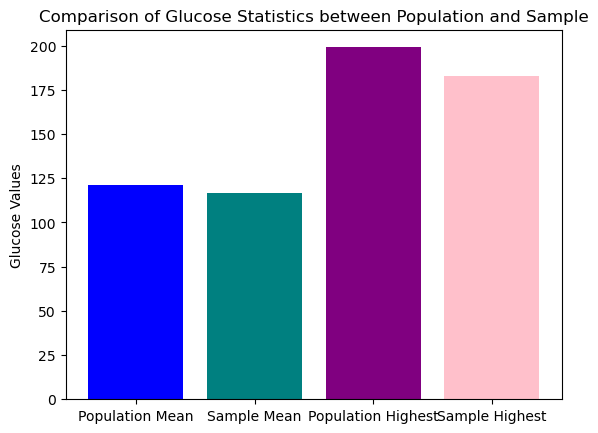

In [5]:
# Plot a bar chart to compare the statistics
labels = ['Population Mean', 'Sample Mean', 'Population Highest', 'Sample Highest']
values = [mean_pop, mean_sample, max_pop, max_sample]

plt.bar(labels, values, color=['blue', 'teal', 'purple', 'pink'])
plt.ylabel('Glucose Values')
plt.title('Comparison of Glucose Statistics between Population and Sample')
plt.show()

In [6]:
sample_98th = np.percentile(sample["BMI"],98)
population_98th = np.percentile(df["BMI"],98)

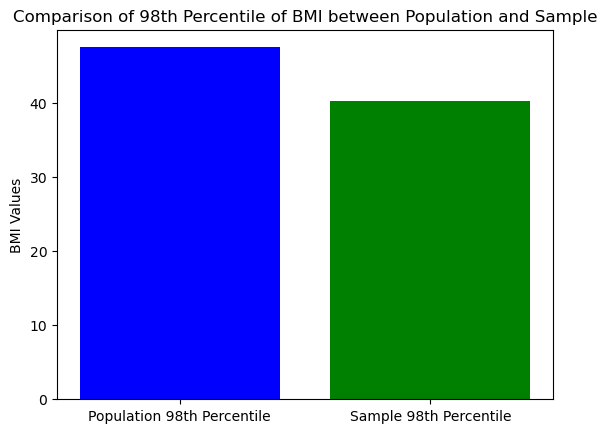

In [7]:
labels = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_98th, sample_98th]

plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('BMI Values')
plt.title('Comparison of 98th Percentile of BMI between Population and Sample')
plt.show()

In [8]:
#Use bootstrap
num_bootstrap_samples = 500
bootstrap_sample_size = 150

#initialize arrays for bootstrap values
bootstrap_means = np.zeros(num_bootstrap_samples)
bootstrap_std_devs = np.zeros(num_bootstrap_samples)
bootstrap_percentiles = np.zeros(num_bootstrap_samples)

for i in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(df["BloodPressure"], size=bootstrap_sample_size, replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)
    bootstrap_std_devs[i] = np.std(bootstrap_sample)
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 95)
    
#find std deev, mean, and percentile from population
population_std = df["BloodPressure"].std()
population_mean = df["BloodPressure"].mean()
population_98th = np.percentile(df["BloodPressure"],95)

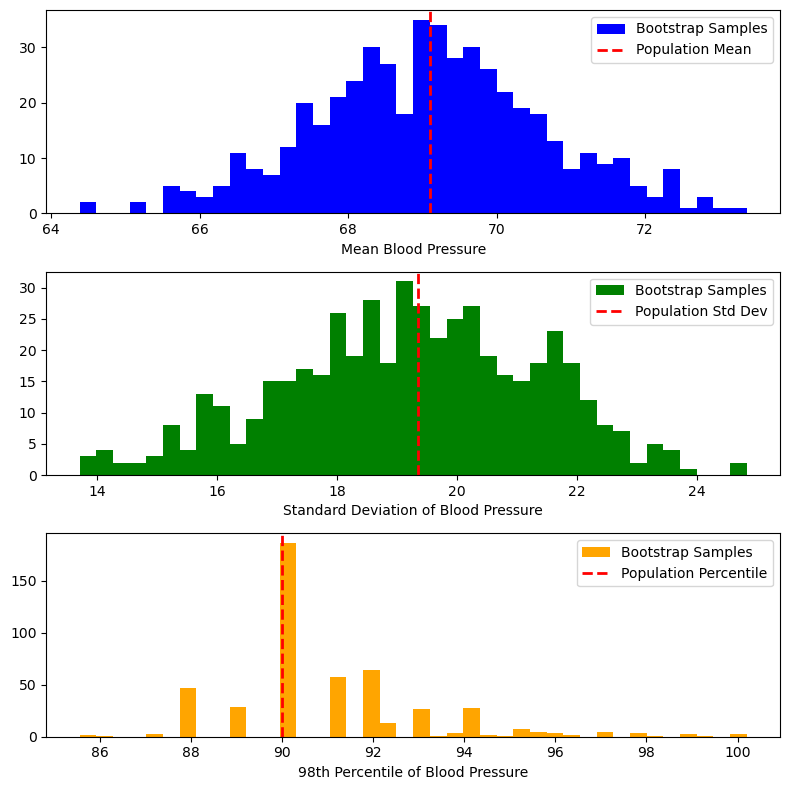

In [9]:
#plot histograms

plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
plt.hist(bootstrap_means, bins=40, color='blue', label='Bootstrap Samples')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.xlabel('Mean Blood Pressure')
plt.legend()

plt.subplot(3, 1, 2)
plt.hist(bootstrap_std_devs, bins=40, color='green', label='Bootstrap Samples')
plt.axvline(population_std, color='red', linestyle='dashed', linewidth=2, label='Population Std Dev')
plt.xlabel('Standard Deviation of Blood Pressure')
plt.legend()

plt.subplot(3, 1, 3)
plt.hist(bootstrap_percentiles, bins=40, color='orange', label='Bootstrap Samples')
plt.axvline(population_98th, color='red', linestyle='dashed', linewidth=2, label='Population Percentile')
plt.xlabel('98th Percentile of Blood Pressure')
plt.legend()

plt.tight_layout()
plt.show()

The histograms show that the distribution of the bootstrapping samples for mean and standard deviation are consistent with those of the population's. The histogram of the 98th percentile of blood pressure shows that it is skewed more towards the right. 